In [ ]:
# https://help.instagram.com/535503073130320/
# https://help.instagram.com/126382350847838
# meta는 자체 신고 가이드라인만 가지고 있음

In [ ]:
# 링크는 함수(beautifulsoup4 사용) 만들어서 데코레이터 tool로 사용하고 각 페이지 크롤링 후 LLM이 tool로 사용
# pdf파일은 vectorDB에 넣고 사용 -> tavily
# LCEL과 Agent 활용해서 tool로 사용
# chain과 tool을 데코레이터로 활용 -> tools.py로?
# retriever 방식 -> MultiQueryRetriever
# advanced RAG -> rerank, agent, langgraph
# text split -> text splitters, CharacterTextsplitter, recursivecharactertextsplitter, semanticchunker => recursive 택

In [ ]:
# ## vectorstore 연결 참고용

# # Load -> chunking -> embedding -> Store
# text_path = "data/olympic.txt"
# collection_name = "olympic_info"
# persist_directory = "vector_store/chroma/olympic_info"

# ## load + split
# loader = TextLoader(text_path, encoding="utf-8")
# splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)

# docs = loader.load_and_split(splitter)
# print(len(docs))

# # VectorStore와 연결
# embedding_model = OpenAIEmbeddings(model="text-embedding-3-large")
# # vector_store = Chroma.from_documents(docs=docs,  # 연결하면서 문서 추가.
# vector_store = Chroma(  # 연결
#     embedding_function=embedding_model,
#     collection_name=collection_name,
#     persist_directory=persist_directory
# ) 

In [ ]:
# ## Agent 생성 및 tool 활용 예시

# from textwrap import dedent
# from langchain_core.runnables import chain
# ################################################################################################
# # search_web, search_wiki, search_menu 툴을 사용하는 메뉴/음식 추천 정보제공 agent
# ################################################################################################

# from langchain_openai import ChatOpenAI
# from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
# from tools import search_web, search_wikipedia, search_menu
# from dotenv import load_dotenv
# load_dotenv()


# model = ChatOpenAI(model="gpt-4.1")
# agent_prompt = ChatPromptTemplate.from_messages(
#     [
#         ("system", dedent("""
#             당신은 레스토랑 메뉴 정보와 일반적인 음식 관련 지식을 제공하는 AI 어시스턴트입니다. 
#             주요 목표는 사용자의 요청에 대한 정확한 정보를 제공하고 메뉴를 추천하는 것입니다.
                          
#             주요 지침들(guidelines):
#                 레스토랑의 메뉴관련 정보를 확인하려면 search_menu 도구를 사용하십시오. 이 도구는 레스토랑의 메뉴들의 가격, 음식의 특징들에 대한 정보를 제공합니다.
#                 일반적인 음식 정보, 그 음식의 유래, 문화적 배경에 대한 정보는 search_wiki 도구를 사용하십시오. 이 도구는 wikipedia 에서 정보를 검색해서 제공합니다.
#                 추가적인 웹 검색이 필요하거나 최신 정보를 얻고 싶을 때는 search_web 도구를 사용하십시오. 이 도구는 인터넷 검색을 통해 정보를 검색해서 제공합니다.
#                 검색 결과를 기반으로 명확하고 간결한 답변을 제공하십시오.
#                 요청 받은 질문이 모호하거나 필요한 정보가 부족한 경우 정중하게 설명을 요청하세요.
#                 메뉴 정보를 제공할 때는 가격, 주재료, 특징 순으로 설명하세요.
#                 메뉴를 추천 할 때는 간단하게 추천 이유를 설명해주세요.
#                 최종 응답은 챗봇과 같은 대화형 스타일을 유지하세요. 친근하고 매력적이며 자연스럽게 소통하되 전문성을 보이는 어조를 유지하세요.

#             각 도구의 목적과 기능을 정확하게 이해하고 각 적절한 상황에서 사용하세요.
#             각 도구들을 결합해서 사용자의 요청에 정확한 대답을 하세요.
#             항상 가장 최신의 정확한 정보를 제공하기 위해 노력하세요.
#             """)),
#         # MessagesPlaceholder(variable_name="chat_history", optional=True),  # 메모리 기능 사용시.
#         ("human", "{query}"),
#         MessagesPlaceholder(variable_name="agent_scratchpad", optional=True) # AIMessage(tool calling정보, ToolMessage)
#     ]
# )

# # Agent 생성
# from langchain.agents import create_tool_calling_agent, AgentExecutor
# # create_tool_calling_agent : Agent 체인 구성
# # AgentExecutor : Agent 체인 실행

# tools = [search_web, search_wikipedia, search_menu]
# agent = create_tool_calling_agent(
#     llm=model,
#     tools=tools,
#     prompt=agent_prompt
# )
# agent_executor = AgentExecutor(
#     agent=agent,                                        # tool_model chain
#     tools=tools                                         # 호출할 tools
# )

# response = agent_executor.invoke({"query":"오늘 점심 추천해줘. 그 요리에 대한 설명도 부탁할게."})

In [2]:
# 1. 데이터 로드
from langchain_community.document_loaders import PyMuPDFLoader

pdf_paths = [
            "저작권법.pdf", 
            "저작권상담사례집2024.pdf", 
            "인공지능과 저작권 제1-2부.pdf", 
            "최진원_알기 쉬운 저작권 계약 가이드북(제2판)_2024.pdf", 
            "naver.pdf",
            "1인 미디어 창작자를 위한 저작권 안내서(2019).pdf",
            "US_copyright.pdf",
            "wipo_copyright.pdf",
            "공공저작물 저작권 관리 및 이용 지침 해설서(개정20240101업로드용).pdf",
            "네이버 블로그.pdf",
            "카카오 서비스 약관20230109.pdf",
            "하버드)해외 저작권, 공정이용 가이드라인.pdf",
            "생성형AI 저작권 가이드라인.pdf"
            ]

import fitz  # PyMuPDF

# markdown에 넣기
def pdfs_as_markdown_blocks(pdf_paths: list[str]) -> list[dict]:
    all_blocks = []

    for pdf_path in pdf_paths:
        doc = fitz.open(pdf_path)
        for page in doc:
            blocks_data = page.get_text("dict")["blocks"]
            for block in blocks_data:
                if "lines" not in block:
                    continue
                text = ""
                for line in block["lines"]:
                    for span in line["spans"]:
                        text += span["text"]
                text = text.strip()
                if text:
                    # 마크다운 구조 분류
                    if text.startswith("제") and "조" in text:
                        all_blocks.append({"type": "section", "text": f"## {text}"})
                    elif text.endswith("가이드") or len(text) < 20:
                        all_blocks.append({"type": "title", "text": f"# {text}"})
                    else:
                        all_blocks.append({"type": "paragraph", "text": text})
    return all_blocks

all_blocks = pdfs_as_markdown_blocks(pdf_paths)

In [3]:
## 2. Text split
from langchain.text_splitter import MarkdownHeaderTextSplitter, RecursiveCharacterTextSplitter
from langchain_core.documents import Document

# 1. Markdown header 기반 splitter 정의
header_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=[("#", "title"), ("##", "section")])

# 2. 블록 → Markdown 텍스트로 변환
def blocks_to_markdown_text(blocks):
    return "\n\n".join(b["text"] for b in blocks)

markdown_text = blocks_to_markdown_text(all_blocks)

# 3. Markdown header 기준으로 구조 단위로 분할 (Document 객체 반환됨)
structured_chunks = header_splitter.split_text(markdown_text)

# 4. Recursive splitter 설정
recursive_splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=100)

# 5. 구조 단위 chunk들을 다시 세부적으로 쪼개고, metadata 유지
final_split_docs = []
for doc in structured_chunks:
    content = doc.page_content      # ✅ Document 객체로부터 텍스트 추출
    metadata = doc.metadata         # ✅ Document 객체로부터 메타데이터 추출

    small_chunks = recursive_splitter.split_text(content)
    for chunk in small_chunks:
        final_split_docs.append(Document(page_content=chunk, metadata=metadata))


In [4]:
len(final_split_docs)

5616

In [5]:
# 3. metadata 반영
from langchain_core.documents import Document

def assign_metadata(docs: list[Document]) -> list[Document]:
    result = []

    for doc in docs:
        text = doc.page_content.lower()
        metadata = doc.metadata.copy()  # 기존 metadata 보존

        # 1. 플랫폼
        platforms = ["네이버", "카카오", "유튜브", "인스타그램", "naver", "kakao", "youtube", "instagram"]
        matched_platforms = [p for p in platforms if p in text]
        if matched_platforms:
            metadata["platform"] = ", ".join(matched_platforms)  # ✅ 리스트를 문자열로 변환

        # 2. 법 영역 (국내/해외)
        if any(word in text for word in ["fair use", "dmca", "united states", "미국"]):
            metadata["law_scope"] = "해외"
        elif any(word in text for word in ["저작권법", "공공누리", "kogl", "대한민국"]):
            metadata["law_scope"] = "국내"

        # 3. 문서 유형
        if any(word in text for word in ["사례", "faq"]):
            metadata["doc_type"] = "사례집"
        elif any(word in text for word in ["가이드", "guide"]):
            metadata["doc_type"] = "가이드"
        elif any(word in text for word in ["법", "조항", "제"]):
            metadata["doc_type"] = "법령"

        # 4. 출처
        if "저작권법" in text:
            metadata["source"] = "저작권법"
        elif "dmca" in text:
            metadata["source"] = "DMCA"
        elif "공공누리" in text or "kogl" in text:
            metadata["source"] = "KOGL"
        elif "크리에이티브 커먼즈" in text or "creative commons" in text:
            metadata["source"] = "CC"

        # 5. 토픽 자동 태깅
        keyword_to_topic = {
            "음악": "음악사용",
            "배경음악": "음악사용",
            "이미지": "이미지사용",
            "ai": "ai저작권",
            "인공지능": "ai저작권",
            "공정이용": "공정이용",
            "인용": "인용",
            "계약": "저작권계약",
            "저작권료": "저작권계약",
            "공공저작물": "공공저작물"
        }
        topics = {tag for keyword, tag in keyword_to_topic.items() if keyword in text}
        if topics:
            metadata["topic"] = ", ".join(topics)  # ✅ 리스트 → 문자열 변환

        # 문서에 metadata 반영
        doc.metadata = metadata
        result.append(doc)

    return result

result_docs = assign_metadata(final_split_docs)


In [6]:
# 4. embedding 모델 생성 
from dotenv import load_dotenv
from langchain_openai import OpenAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore
load_dotenv()
embedding_model = OpenAIEmbeddings(model="text-embedding-3-large")

In [7]:
## 5. DB 생성
from langchain_chroma import Chroma
from langchain_core.documents import Document
import math

# 1. Chroma 인스턴스 생성
vector_store = Chroma(
    embedding_function=embedding_model,
    collection_name="rag_chatbot",
    persist_directory="vector_store/chroma/rag_chatbot"
)

# 2. 문서 배치 추가 함수 정의
def batch_add_documents(vector_store, documents: list[Document], batch_size: int = 500):
    total = len(documents)
    num_batches = math.ceil(total / batch_size)

    for i in range(num_batches):
        batch = documents[i * batch_size : (i + 1) * batch_size]
        vector_store.add_documents(batch)
        print(f"✅ Added batch {i+1}/{num_batches} (size: {len(batch)})")

# 문서 추가
batch_add_documents(vector_store, result_docs, batch_size=500)

# # 저장 메시지 출력 (persist 호출 없이)
# print("✅ Vector store saved to disk at:", persist_directory)

✅ Added batch 1/12 (size: 500)
✅ Added batch 2/12 (size: 500)
✅ Added batch 3/12 (size: 500)
✅ Added batch 4/12 (size: 500)
✅ Added batch 5/12 (size: 500)
✅ Added batch 6/12 (size: 500)
✅ Added batch 7/12 (size: 500)
✅ Added batch 8/12 (size: 500)
✅ Added batch 9/12 (size: 500)
✅ Added batch 10/12 (size: 500)
✅ Added batch 11/12 (size: 500)
✅ Added batch 12/12 (size: 116)


In [25]:
# 6. Retriever (MMR + MultiQuery)
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain_openai import ChatOpenAI

# LLM 인스턴스 생성 (예: temperature=0, gpt-4.1 등)
llm = ChatOpenAI(model="gpt-4.1", temperature=0)

# Chroma 벡터DB의 기본 retriever 사용
retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=vector_store.as_retriever(),
    llm=llm
)

In [ ]:
# 7. Instagram Help Tool 정의
from langchain.tools import tool
from langchain_tavily import TavilySearch
import requests
from bs4 import BeautifulSoup

@tool
def youtube_copyright_help(query: str) -> str:
    """유튜브 저작권 정책 도움말(https://support.google.com/youtube/answer/2797466)"""
    url = "https://support.google.com/youtube/answer/2797466?hl=ko&ref_topic=2778546"
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, "html.parser")
        text = soup.get_text(separator="\n")
        return text[:2000]
    except Exception:
        return "YouTube 저작권 정책 도움말 페이지에 접근할 수 없습니다."

@tool
def youtube_general_help(query: str) -> str:
    """유튜브 일반 정책 도움말(https://support.google.com/youtube/answer/9245819)"""
    url = "https://support.google.com/youtube/answer/9245819?hl=ko&ref_topic=9282364"
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, "html.parser")
        text = soup.get_text(separator="\n")
        return text[:2000]
    except Exception:
        return "YouTube 일반 정책 도움말 페이지에 접근할 수 없습니다."


@tool
def kakao_terms_help(query: str) -> str:
    """카카오 서비스 약관(https://www.kakao.com/policy/terms?type=ts&lang=ko#useterms03_09)"""
    url = "https://www.kakao.com/policy/terms?type=ts&lang=ko#useterms03_09"
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, "html.parser")
        text = soup.get_text(separator="\n")
        return text[:2000]
    except Exception:
        return "카카오 서비스 약관 페이지에 접근할 수 없습니다."

@tool
def kakao_rights_help(query: str) -> str:
    """카카오 권리 정책(https://www.kakao.com/policy/right)"""
    url = "https://www.kakao.com/policy/right"
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, "html.parser")
        text = soup.get_text(separator="\n")
        return text[:2000]
    except Exception:
        return "카카오 권리 정책 페이지에 접근할 수 없습니다."

@tool
def kakaopage_publishing_help(query: str) -> str:
    """카카오페이지 퍼블리싱 정책(https://biz.kakaopage.com/publishingcenter/popupfooter/policy)"""
    url = "https://biz.kakaopage.com/publishingcenter/popupfooter/policy"
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, "html.parser")
        text = soup.get_text(separator="\n")
        return text[:2000]
    except Exception:
        return "카카오페이지 퍼블리싱 정책 페이지에 접근할 수 없습니다."



@tool
def instagram_copyright_help(query: str) -> str:
    """인스타 저작권 관련 도움말 웹 서치 툴"""
    url = "https://help.instagram.com/535503073130320/"
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, "html.parser")
        text = soup.get_text(separator="\n")
        return text[:2000]
    except Exception:
        return "Instagram 저작권 도움말 페이지에 접근할 수 없습니다."

@tool
def instagram_general_help(query: str) -> str:
    """인스타 도움말 웹 서치 툴"""
    url = "https://help.instagram.com/126382350847838/"
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, "html.parser")
        text = soup.get_text(separator="\n")
        return text[:2000]
    except Exception:
        return "Instagram 일반 도움말 페이지에 접근할 수 없습니다."


@tool
def search_web(query: str, max_results: int = 3, time_range: str = "month") -> dict:
    """최신 정보가 필요할 때 인터넷 검색을 하는 Tool입니다."""
    tavily_search = TavilySearch(max_results=max_results, time_range=time_range)
    search_result = tavily_search.invoke(query)["results"]
    if search_result:
        return {"result": search_result}
    else:
        return {"result": "검색결과가 없습니다."}


In [101]:
# 8. 프롬프트 템플릿 및 체인 정의
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from datetime import date
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import Runnable
from tools import TOOLS
from langchain_openai import ChatOpenAI

# 프롬프트 템플릿 수정 (MessagesPlaceholder 사용)
system_message = (
    "당신은 각종 플랫폼에 관한 저작권 Q&A를 답변하는 AI 어시스턴트입니다. "
    "사용자가 이름 등 개인정보를 알려주면 반드시 기억하고, 이후 질문에 활용하세요. "
    "예: 사용자가 '내 이름은 홍길동이야.'라고 하면, 이후 '내 이름이 뭐야?'에 '홍길동님'이라고 답해야 합니다. "
    "최신 정보가 필요하거나 DB나 tools에 없는 내용이라면 search_web 도구를 활용하세요. "
    "정보가 없으면 '모릅니다'라고 답변하세요. "
    "오늘 날짜는 {today}입니다."
)

prompt_template = ChatPromptTemplate.from_messages([
    ("system", system_message),
    MessagesPlaceholder(variable_name="messages")
])

prompt = prompt_template.partial(today=date.today().strftime('%Y-%m-%d'))

In [102]:
# 9. 체인 정의
from tools import TOOLS
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4.1", temperature=0.7)
tool_model = llm.bind_tools(tools=TOOLS)
output_parser = StrOutputParser()
chain: Runnable = prompt | tool_model | output_parser

In [103]:
# 10. LangGraph 노드 정의 (HumanMessage/AIMessage 기반)
from typing import TypedDict, List, Any
from langchain.schema import HumanMessage, AIMessage

class State(TypedDict):
    messages: List[Any]  # HumanMessage, AIMessage 등

def chatbot_node(state: State) -> State:
    # messages만 전달 (query 변수 제거)
    response = chain.invoke({"messages": state["messages"]})
    ai_msg = AIMessage(content=response)
    return {"messages": state["messages"] + [ai_msg]}

In [108]:
# 11. LangGraph 워크플로우 및 Checkpointer 설정
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

checkpointer = MemorySaver()  # 인메모리, 프로세스 종료 시 휘발
graph = StateGraph(State)
graph.add_node("Chatbot", chatbot_node)
graph.add_edge(START, "Chatbot")
graph.add_edge("Chatbot", END)
workflow = graph.compile(checkpointer=checkpointer)

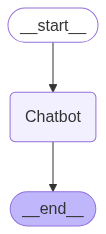

In [114]:
from IPython.display import Image

img = workflow.get_graph().draw_mermaid_png()
Image(img)


In [105]:
# 12. 대화 실행 및 결과 출력

def run_chat():
    print("=== Instagram 도움말 Tool + Tavily + LangGraph 대화 ===")
    thread_id = "user-1"
    config = {"configurable": {"thread_id": thread_id}}
    messages = []
    while True:
        user_input = input("\n질문을 입력하세요(종료: exit): ")
        if user_input.strip().lower() == "exit":
            break
        messages.append(HumanMessage(content=user_input))
        state = {"messages": messages}
        response = workflow.invoke(state, config=config)
        ai_messages = [msg for msg in response["messages"] if isinstance(msg, AIMessage)]
        if ai_messages:
            print("\n[AI 답변]:\n", ai_messages[-1].content)
        print("[현재 대화 이력]:")
        for i, m in enumerate(response["messages"]):
            role = "사용자" if m.type == "human" else "AI"
            print(f"{i+1}. [{role}] {m.content}")
        messages = response["messages"]

In [106]:
# 13. 실행
if __name__ == "__main__":
    run_chat()

=== Instagram 도움말 Tool + Tavily + LangGraph 대화 ===

[AI 답변]:
 네이버의 저작권 정책에 대해 안내드리겠습니다.

네이버는 사용자가 네이버 서비스(블로그, 카페, 포스트, 밴드 등)에 게시하는 모든 콘텐츠(텍스트, 이미지, 동영상 등)에 대해 저작권을 매우 중요하게 다루고 있습니다. 주요 내용은 다음과 같습니다:

1. **저작권 보호**  
네이버에 게시하는 모든 콘텐츠는 해당 콘텐츠의 창작자(작성자)에게 저작권이 있습니다. 타인의 저작물을 무단으로 복제, 배포, 전송, 전시, 2차적 저작물 작성(리믹스 등)해서는 안 됩니다.

2. **저작권 침해 신고**  
저작권자가 자신의 저작물이 무단으로 네이버에 게시되어 있다고 판단할 경우, 네이버 저작권 보호센터를 통해 침해 신고를 할 수 있습니다. 네이버는 신고 접수 후, 해당 게시물을 임시로 차단하고 사실관계를 확인합니다.

3. **공정 이용 및 예외**  
저작권법에서 정한 '공정 이용' 범위 내에서는 타인의 저작물을 일부 사용할 수 있습니다. 예를 들어, 비평, 보도, 교육, 연구 등을 위한 경우가 해당합니다. 그러나 이 역시도 최소한의 범위에서만 허용됩니다.

4. **저작권 책임**  
사용자가 네이버에 게시한 모든 콘텐츠에 대한 법적 책임은 작성자 본인에게 있습니다. 타인의 저작물을 사용할 때는 반드시 사전에 저작권자의 허락을 받아야 하며, 출처 표기만으로는 저작권 침해가 면책되지 않습니다.

5. **네이버의 저작권 정책 안내**  
네이버는 저작권 보호를 위한 다양한 안내, 교육, 신고 시스템을 운영하고 있습니다. 자세한 내용은 네이버 고객센터나 저작권 보호센터(https://copyrightcenter.naver.com/)에서 확인하실 수 있습니다.

궁금하신 점이 더 있으시면 구체적으로 질문해 주세요!
[현재 대화 이력]:
1. [사용자] 네이버 저작권에 대해 알려줘.
2. [AI] 네이버의 저작권 정책에 대해 안내드리겠습니다.

네이버는 사용자가